## AP Data Science Project : Spotify


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928


In [4]:
# Dropping unwanted columns:
df.drop(['id','key','explicit','mode','release_date','liveness','instrumentalness'],axis=1, inplace=True)

In [5]:
df.head(3)

,acousticness,artists,danceability,duration_ms,energy,loudness,name,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928


In [6]:
current_Data_Frame = df.shape

In [7]:
current_Data_Frame #We will need a later to check our duplicate values.

(169909, 12)

In [8]:
#Checking to see if the dataframe has an index associated with it:
df.index.values

array([     0,      1,      2, ..., 169906, 169907, 169908])

# Cleaning Data

## Missing Data

In [9]:
# Checking to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
    

acousticness - 0.0%
artists - 0.0%
danceability - 0.0%
duration_ms - 0.0%
energy - 0.0%
loudness - 0.0%
name - 0.0%
popularity - 0.0%
speechiness - 0.0%
tempo - 0.0%
valence - 0.0%
year - 0.0%


In [10]:
df.isna().any().any()
#False = no missing data type na

False

In [11]:
df.isna().sum().sum()

0

In [12]:
df.isnull() #True = Missing

,acousticness,artists,danceability,duration_ms,energy,loudness,name,popularity,speechiness,tempo,valence,year
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().values.any()

False

In [14]:
# Our initial dataframe doesn't have any missing data, but after deleteing outliers and duplicates, we'll have created 
#many missing data that we'll take care of later.

## Duplicate Data:

In [15]:
# Now we move on to duplicate data.

df.drop_duplicates( inplace = True )  #Drops all duplicate rows.

In [16]:
df.shape

# The number of the rows changed (compared to  current_Data_Frame) , so there must have been a few duplicate rows.


# We only dropped rows that all of thier values were duplicates, as it's allright if one or a few of the values
#are repeated throughout the DataFrame.

(169301, 12)

## Outliers

In [17]:
# Moveing on to outliers: To detect them visually, we make a box plot for each column.
# Then we'll use simple statistics concepts to get rid of them.


# A brief review of box plots and IQR:



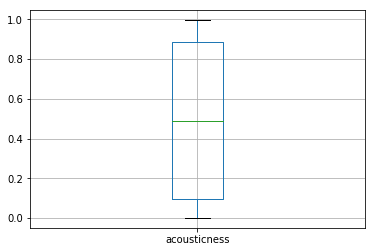

In [18]:
Q1 =  df['acousticness'].quantile(0.25)
Q3 = df['acousticness'].quantile(0.75)
IQR = Q3 - Q1

df['acousticness'] = df[(df['acousticness'] > Q1-1.5*IQR ) & (df['acousticness'] < Q3+1.5*IQR)]['acousticness']

df.boxplot(column=['acousticness'])
plt.show()

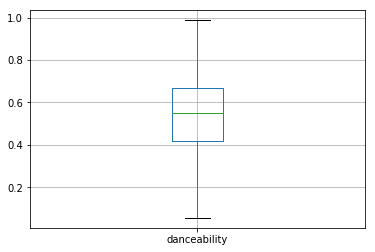

In [19]:
Q1 =  df['danceability'].quantile(0.25)
Q3 = df['danceability'].quantile(0.75)
IQR = Q3 - Q1

df['danceability'] = df[(df['danceability'] > Q1-1.5*IQR ) & (df['danceability'] < Q3+1.5*IQR)]['danceability']


df.boxplot(column=['danceability'])  
plt.show()

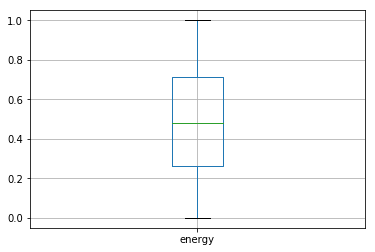

In [20]:
Q1 =  df['energy'].quantile(0.25)
Q3 = df['energy'].quantile(0.75)
IQR = Q3 - Q1

df['energy'] = df[(df['energy'] > Q1-1.5*IQR ) & (df['energy'] < Q3+1.5*IQR)]['energy']

df.boxplot(column=['energy'])
plt.show()

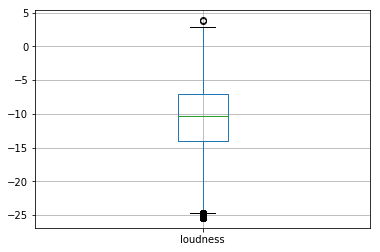

In [21]:
Q1 =  df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1

df['loudness'] = df[(df['loudness'] > Q1-1.5*IQR ) & (df['loudness'] < Q3+1.5*IQR)]['loudness']

df.boxplot(column=['loudness']) 

plt.show()


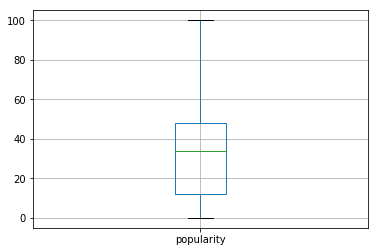

In [22]:
Q1 =df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1

df['popularity'] = df[(df['popularity'] > Q1-1.5*IQR ) & (df['popularity'] < Q3+1.5*IQR)]['popularity']


df.boxplot(column=['popularity'])
plt.show()

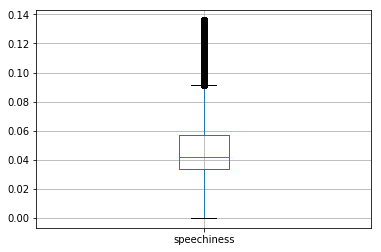

In [23]:
Q1 =  df['speechiness'].quantile(0.25)
Q3 = df['speechiness'].quantile(0.75)
IQR = Q3 - Q1

df['speechiness'] = df[(df['speechiness'] > Q1-1.5*IQR ) & (df['speechiness'] < Q3+1.5*IQR)]['speechiness']

df.boxplot(column=['speechiness'])
plt.show()


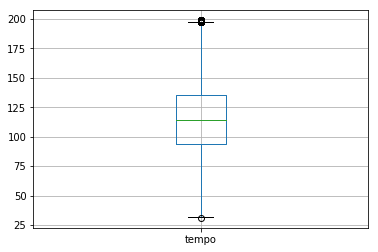

In [24]:
Q1 =  df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

df['tempo'] = df[(df['tempo'] > Q1-1.5*IQR ) & (df['tempo'] < Q3+1.5*IQR)]['tempo']

df.boxplot(column=['tempo']) 
plt.show()


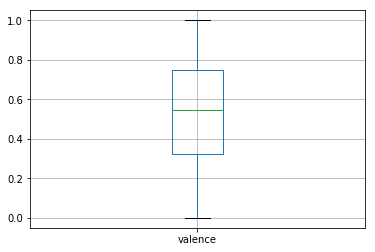

In [25]:
Q1 =df['valence'].quantile(0.25)
Q3 = df['valence'].quantile(0.75)
IQR = Q3 - Q1

df['valence'] = df[(df['valence'] > Q1-1.5*IQR ) & (df['valence'] < Q3+1.5*IQR)]['valence']

df.boxplot(column=['valence'])
plt.show()

## Missing Data Again:

In [26]:
#After taking care of outliers and duplicates,we have created some missing data,we simply drop rows that have at least one missing data.
df = df.dropna()

# The Fun Part:

In [27]:
df.sort_values(by=['year'] , inplace = True)
df.reset_index(inplace = True )
df.drop(["index"],axis=1, inplace=True)

In [28]:
df_clean = pd.DataFrame()

df_clean['Popularity'] = df['popularity']
df_clean['Name'] = df['name']
df_clean['Artists'] = df['artists']
df_clean['Year'] = df['year']
df_clean['Duration'] = df['duration_ms']
df_clean['Danceability'] = df['danceability']
df_clean['Energy'] = df['energy']
df_clean['Acousticness'] = df['acousticness']
df_clean['Loudness'] = df['loudness']
df_clean['Speechiness'] = df['speechiness']
df_clean['Tempo'] = df['tempo']
df_clean['Valence'] = df['valence']

In [29]:
def time(ms):
    s = ms//1000
    M = s//60
    S = s%60
    return ("%d:%d" % ( M,S))

df_clean['Duration'] = df_clean['Duration'].apply(time)

In [30]:
df_clean.head(4)

,Popularity,Name,Artists,Year,Duration,Danceability,Energy,Acousticness,Loudness,Speechiness,Tempo,Valence
0,0,El Ultimo Adiós - Remasterizado,['Ignacio Corsini'],1921,2:43,0.348,0.345,0.948,-21.624,0.0654,65.854,0.730
1,1,It's the Same Old Shillelegh,['Morton Downey'],1921,2:33,0.829,0.333,0.959,-11.895,0.1030,132.606,0.919
2,0,Şühedâ Gövdesi Bir Baksana Dağlar Taşlar,['Mehmet Kemiksiz'],1921,6:36,0.403,0.385,0.672,-6.507,0.0315,123.839,0.219
3,0,That's How You Spell Ireland,['Morton Downey'],1921,2:50,0.380,0.117,0.992,-13.298,0.0415,86.493,0.173


In [31]:
df_clean.describe()

,Popularity,Year,Danceability,Energy,Acousticness,Loudness,Speechiness,Tempo,Valence
count,141384.000000,141384.000000,141384.000000,141384.000000,141384.000000,141384.000000,141384.000000,141384.000000,141384.00000
mean,31.927898,1977.338454,0.527563,0.493720,0.496045,-10.993879,0.049575,116.640256,0.53308
std,20.838456,24.445698,0.167920,0.260353,0.373447,4.871809,0.023107,28.726234,0.26410
min,0.000000,1921.000000,0.056200,0.000020,0.000000,-25.411000,0.022200,30.946000,0.00000
25%,15.000000,1958.000000,0.411000,0.276000,0.098600,-14.048000,0.033700,94.821000,0.31800
50%,34.000000,1978.000000,0.536000,0.483000,0.507000,-10.431000,0.041500,115.090500,0.54100
75%,48.000000,1998.000000,0.650000,0.709000,0.881000,-7.208000,0.057100,134.771000,0.75600
max,100.000000,2020.000000,0.988000,1.000000,0.996000,1.812000,0.136000,198.975000,1.00000


# Heatmap : A colored visual summary of information

 The darker the color, the more interactions happen at that data. 
 Stronger correlation is shown in darker, and weaker correlation in lighter shades.

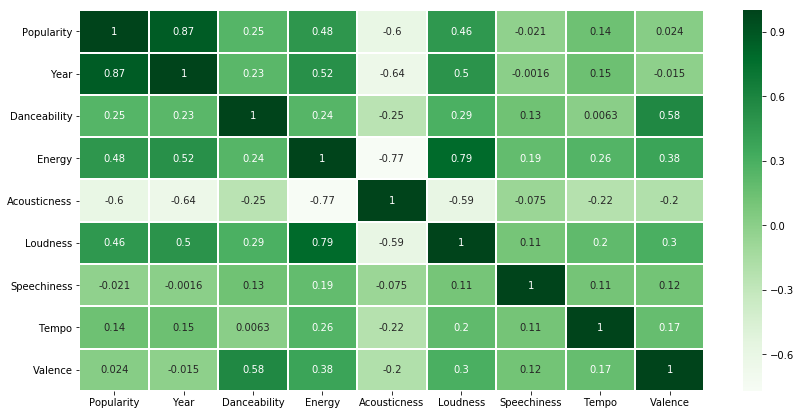

In [32]:
plt.figure(figsize=(14,7))
sns.heatmap(df_clean.corr(), annot = True , cmap = "Greens" , lw = 1 )
plt.show()

#annot : shows the correlation values visible on each colored cell
#df_clean.corr: creates the correlation matrix between all the features we are examining 
#cmap : sets the specific colormap we want to use, we chose greens.
  

# The longest Song:

In [33]:
df_clean.loc[df["duration_ms"].idxmax()]


Popularity                         42
Name            Brown Noise for Sleep
Artists           ['Sounds for Life']
Year                             2009
Duration                        71:10
Danceability                    0.153
Energy                         0.0792
Acousticness                    0.975
Loudness                      -23.962
Speechiness                     0.125
Tempo                         132.904
Valence                      0.000537
Name: 124554, dtype: object

# The most popular song:

In [34]:
for i in range(1921,2021) : 
    if  max(df_clean['Popularity'][df_clean[ 'Year' ] == i ]) == 100 :
        print(df_clean.loc[df_clean['Popularity'][df_clean['Year'] == i ].idxmax()],"\n ____________________________\n")

Popularity                  100
Name            Blinding Lights
Artists          ['The Weeknd']
Year                       2020
Duration                   3:20
Danceability              0.514
Energy                     0.73
Acousticness            0.00146
Loudness                 -5.934
Speechiness              0.0598
Tempo                   171.005
Valence                   0.334
Name: 141288, dtype: object 
 ____________________________



# Song with the highest valence:

In [35]:
for i in range(1921,2021) : 
    if  max(df_clean['Valence'][df_clean[ 'Year' ] == i ]) == 1 :
        print(df_clean.loc[df_clean['Valence'][df_clean['Year'] == i ].idxmax()],"\n ____________________________\n")

Popularity                         49
Name               Pasito Duranguense
Artists         ['Montez de Durango']
Year                             2002
Duration                         3:20
Danceability                    0.912
Energy                          0.824
Acousticness                   0.0776
Loudness                       -5.163
Speechiness                    0.0831
Tempo                         144.925
Valence                             1
Name: 113171, dtype: object 
 ____________________________

Popularity                             50
Name                         Electric Zoo
Artists         ['Spongebob Squarepants']
Year                                 2005
Duration                             0:35
Danceability                        0.723
Energy                              0.844
Acousticness                        0.018
Loudness                           -8.684
Speechiness                        0.0719
Tempo                              164.92
Valence               

/Users/saman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


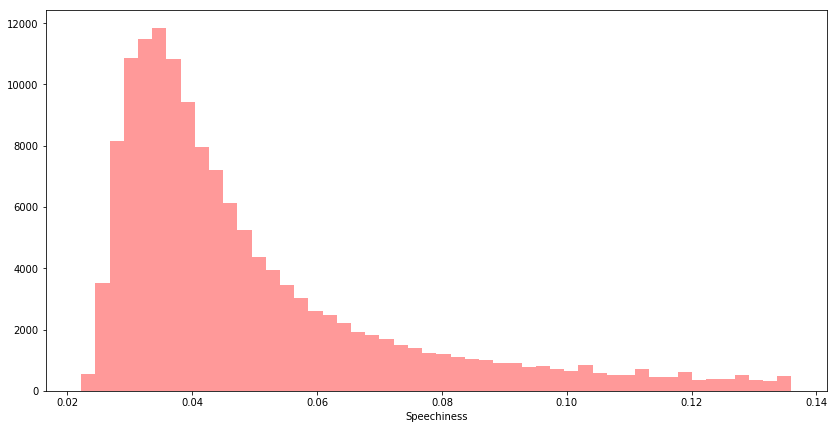

In [36]:
plt.figure(figsize=(14,7))
sns.distplot(df_clean['Speechiness'], kde=False , color = 'r' )
plt.show()

# Would we support The Beatles on our platform?

In [37]:

Q = df_clean[df_clean['Artists'] == "['The Beatles']" ] 

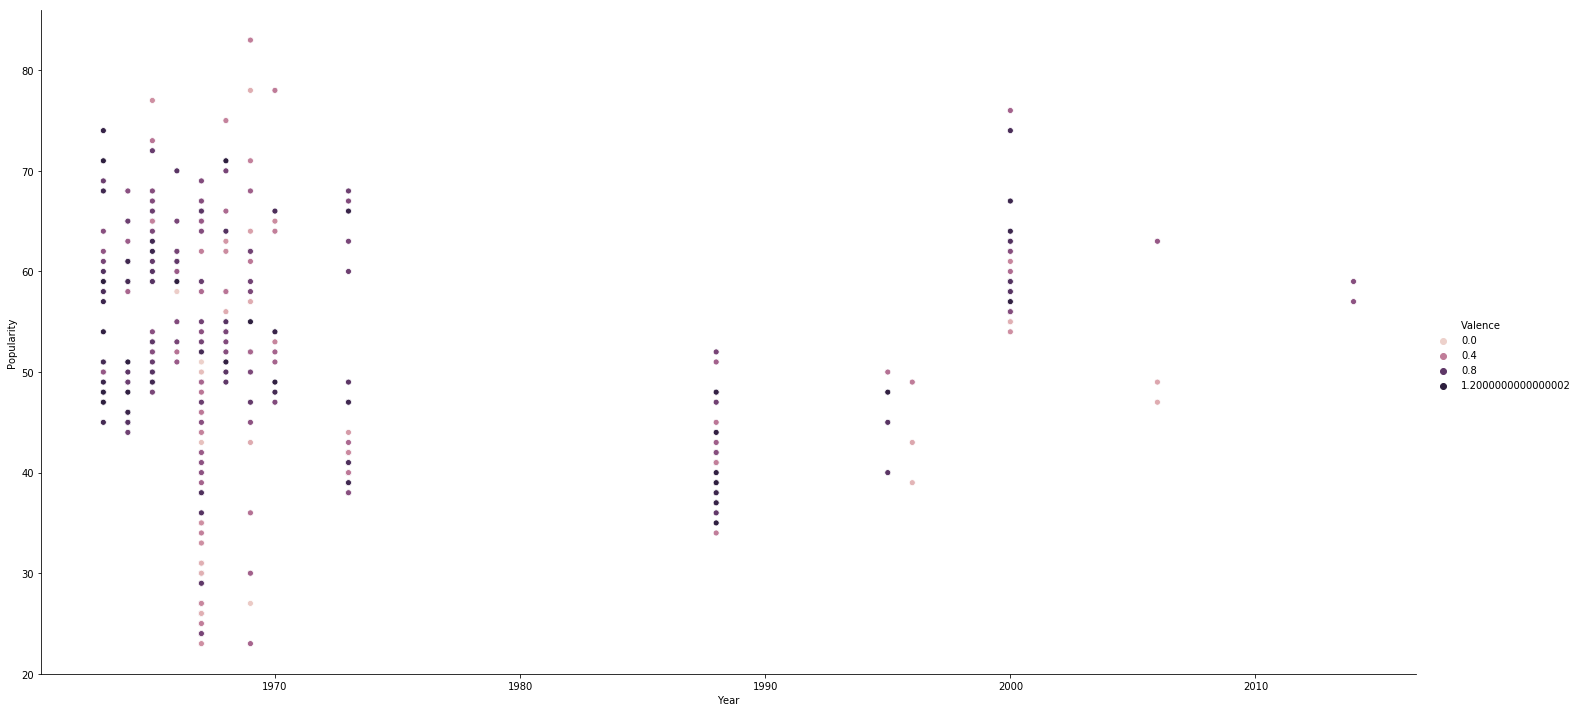

In [38]:
sns.relplot(x= "Year" , y = "Popularity"  ,height= 10 , aspect = 2, data = Q  , hue = "Valence")
plt.show()

/Users/saman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


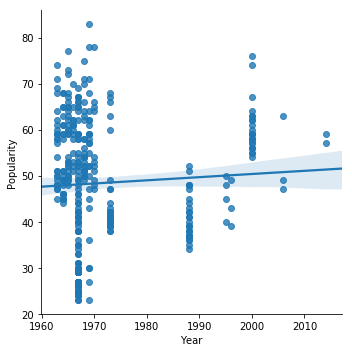

In [39]:
sns.lmplot( x="Year", y="Popularity",  data= Q )
plt.show()

/Users/saman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


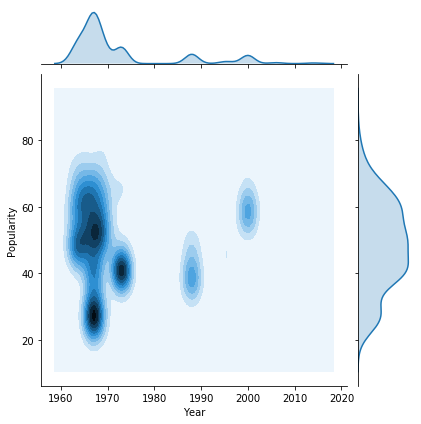

In [40]:
sns.jointplot(x="Year", y="Popularity" , data = Q, kind = 'kde')
plt.show()

Their popularity seems to be on the rise, plus there are always nostalgic fans, so we would support them for now, but we would be watching their populariy, if it decreaces, we would drop them.

# Has the number of artists producing songs each year risen?

In [41]:
# The number of artists producing songs in each year
NA = []

for i in range(1921,2021) :
    A = []
    B = len(df_clean["Artists"][df_clean["Year"] == i ].unique())
    
    for j in range(0,B) :
    
        A.extend(df_clean["Artists"][df_clean["Year"] == i ].unique()[j].strip(" [ ] ").rsplit(","))
        
    NA.append(len(set(A)))  
    
    print( i , ":" , len(set(A)))

1921 : 50
1922 : 14
1923 : 40
1924 : 51
1925 : 67
1926 : 91
1927 : 125
1928 : 167
1929 : 88
1930 : 480
1931 : 85
1932 : 172
1933 : 100
1934 : 151
1935 : 314
1936 : 202
1937 : 190
1938 : 163
1939 : 289
1940 : 440
1941 : 239
1942 : 395
1943 : 210
1944 : 183
1945 : 426
1946 : 404
1947 : 503
1948 : 368
1949 : 640
1950 : 804
1951 : 623
1952 : 592
1953 : 742
1954 : 786
1955 : 631
1956 : 436
1957 : 408
1958 : 403
1959 : 454
1960 : 478
1961 : 418
1962 : 474
1963 : 470
1964 : 435
1965 : 422
1966 : 446
1967 : 430
1968 : 479
1969 : 463
1970 : 469
1971 : 475
1972 : 541
1973 : 520
1974 : 543
1975 : 537
1976 : 510
1977 : 503
1978 : 583
1979 : 557
1980 : 591
1981 : 582
1982 : 608
1983 : 609
1984 : 628
1985 : 659
1986 : 654
1987 : 690
1988 : 731
1989 : 742
1990 : 741
1991 : 687
1992 : 684
1993 : 774
1994 : 795
1995 : 805
1996 : 855
1997 : 848
1998 : 869
1999 : 861
2000 : 851
2001 : 911
2002 : 805
2003 : 890
2004 : 911
2005 : 914
2006 : 901
2007 : 896
2008 : 976
2009 : 876
2010 : 945
2011 : 964
2012 : 

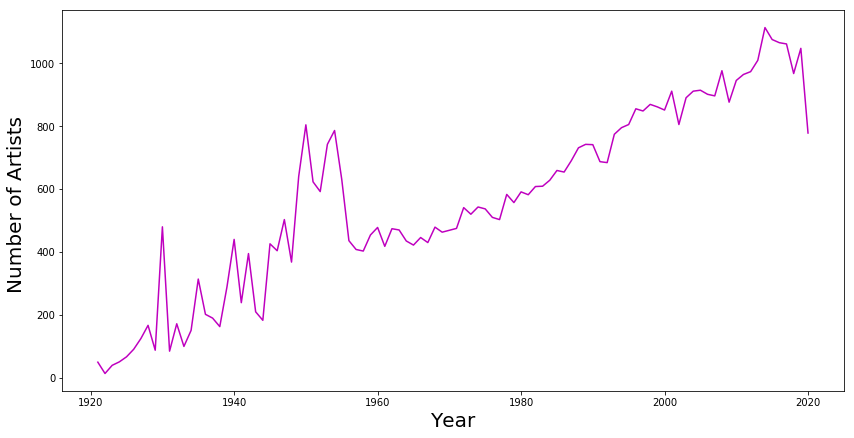

In [42]:
# Showing the above data visually:
Year = df_clean['Year'].unique()
plt.figure(figsize=(14,7))
plt.plot(Year , NA , 'm' )
plt.xlabel("Year" , fontsize = 20 )
plt.ylabel("Number of Artists " , fontsize = 20)
plt.show()

 As shown in the above graph, the number of artists has had its ups and downs: After a peak in 1950's, and the subsequent drop later in the same decade, more and more artists have released songs in each year, until a fall in 2020.

# Feature _ Time plot:

In [43]:
# Calculating the mean of each column:
E = []
D = []
V = []
A = []
S = []
P = []
T = []
L = []
for i in range(1921,2021) :
    E.append(df_clean['Energy'][df_clean['Year'] == i ].mean())
    D.append(df_clean['Danceability'][df_clean['Year'] == i ].mean())
    V.append(df_clean['Valence'][df_clean['Year'] == i ].mean())
    A.append(df_clean['Acousticness'][df_clean['Year'] == i ].mean())
    S.append(df_clean['Speechiness'][df_clean['Year'] == i ].mean())
    P.append((df_clean['Popularity'][df_clean['Year'] == i ].mean())/100)
    T.append(df_clean['Tempo'][df_clean['Year'] == i ].mean())
    L.append(df_clean['Loudness'][df_clean['Year'] == i ].mean())

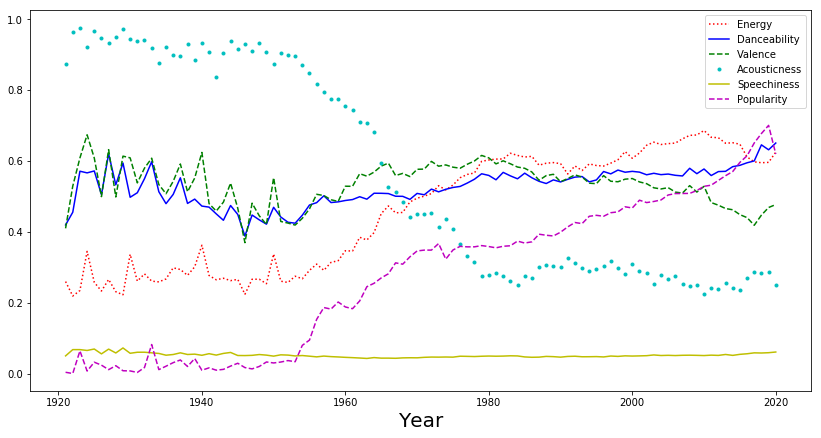

In [44]:
#  
plt.figure(figsize=(14,7))
plt.plot(Year , E , 'r:' , label="Energy" )
plt.plot(Year , D , 'b' , label = 'Danceability')
plt.plot(Year , V , 'g--' , label = 'Valence')
plt.plot(Year , A , 'c.' , label = 'Acousticness')
plt.plot(Year , S , 'Y' , label = 'Speechiness')
plt.plot(Year , P , 'm--' , label = 'Popularity')
plt.xlabel("Year" , fontsize = 20)
plt.legend(loc="best")
plt.show()

# How has people's taste in music changed?

We have to understand that our popularity data shows what people like/dislike at the moment, not what their taste were or how it has changed. For example, the low popularity of older songs show that, now, people don't like those songs, but we have no information about how much people in those decades liked their music.
However, our other data like energy, loudness, ..., are facts and comparable.


## What we understand from the above graph:
Popularity in general has increased, meaning that people prefare the newly realsed songs.
Energy has increased dramatically, meaning people like to listen to and make energetic music.
Acousticness has dropped significantly, so people don't make as many acoustic songs, and people of our era don't like to listen to them.
Dancability and valence have had ups and downs, but in recent years, valence took a dip, as newly released songs aren't very "happy" or "hopeful". But dancability has increased, one could say we are dancing to our sorrows!
Also noteable,valence (the emotional effect of music), has tended to be towards the “happy medium” between happy and sad.


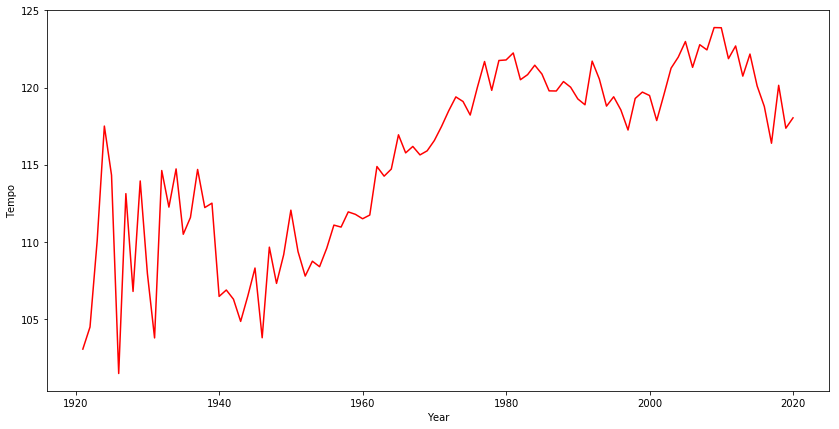

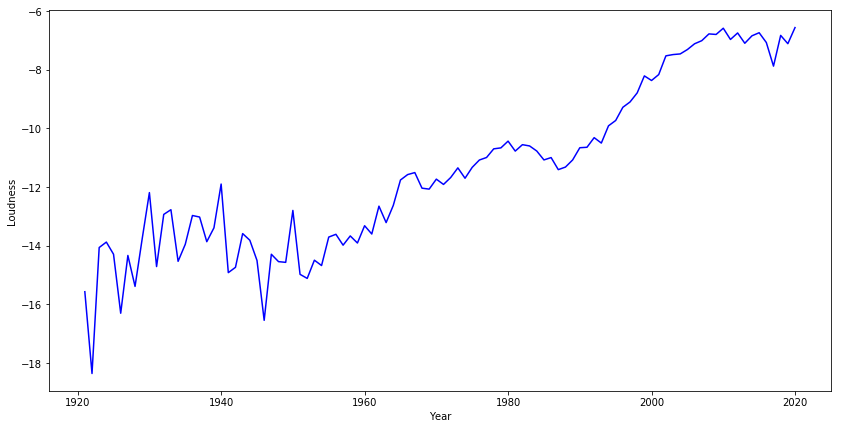

In [45]:
plt.figure(figsize=(14,7))
plt.plot(Year , T , 'r'  )
plt.xlabel("Year")
plt.ylabel("Tempo")
plt.figure(figsize=(14,7))
plt.plot(Year , L , 'b'  )
plt.xlabel("Year")
plt.ylabel("Loudness")
plt.show()


# To increase popularity, which feature should we increase?

To answer the above question, first we need to answer this question:
Which features correlate with popularity? To what extent?

In [46]:
# Finding the correlation:
corr_matrix =df_clean.corr()
print(corr_matrix['Popularity'].sort_values(ascending=False))


Popularity      1.000000
Year            0.866070
Energy          0.475986
Loudness        0.464910
Danceability    0.252244
Tempo           0.140271
Valence         0.024060
Speechiness    -0.020562
Acousticness   -0.601544
Name: Popularity, dtype: float64


Besides popularity itself, the most effective factor is time (year), which we have no control over and just tells us that people in general listen  to music from their own era.
So that leaves us with the next most influential feature: Energy.

In short, to increase popularity, increase energy.

# Should we invest in instrumental music?

Yes!  The above code clearly shows a negative correlation between speechiness and popularity, meaning the less speechiness, the more popular the song is, so instrumental music would be popular.

# Should we let the bands play the acoustic version of their songs?
No! There is a negative correlation between the two, people won't enjoy them.

# To increase valence, which features should we increase/decrease?

First we need to know which factors affect valence.

In [47]:
# Finding the correlation:
corr_matrix =df_clean.corr()
print(corr_matrix['Valence'].sort_values(ascending=False))


Valence         1.000000
Danceability    0.575747
Energy          0.381318
Loudness        0.298504
Tempo           0.172436
Speechiness     0.120354
Popularity      0.024060
Year           -0.015152
Acousticness   -0.201147
Name: Valence, dtype: float64


So we need to increase danceability, energy, loudness, tempo and speechiness; but decrease acousticness, and support slightly older songs. 

# Which artists should we support?
### _ Artist that are popular/ their popularity has been rising steadily.
### _ Artists whose songs have a high level of the factors that increase popularity.
### _ Artists whose songs have a low level of the factors that decrease popularity.

In [48]:
# We make drop the repeated names in artists column , so that are lists are unique.
df_clean = df_clean.drop_duplicates(subset="Artists", keep = 'first')


## Artists whose songs are very popular:

In [49]:
#for index , row in df_clean.iterrows():
    #(index , row['Artists'])
#the artist in each row

In [101]:
# First we rank our dataframe based on popularity:
df_clean['Popularity_Rank'] = df_clean['Popularity'].rank(ascending = 0)
# Then we set it as our index:
df_clean = df_clean.set_index('Popularity_Rank')
df_clean = df_clean.sort_index()
 

In [102]:
top_10_artists =df_clean[['Artists']].head(10)
top = []
top.extend(top_10_artists["Artists"])

In [126]:
top_10_artists

,Artists
Popularity_Rank,
1.0,"['Powfu', 'beabadoobee']"
2.5,"['Surf Mesa', 'Emilee']"
2.5,"['BENEE', 'Gus Dapperton']"
4.5,"['Ariana Grande', 'Justin Bieber']"
4.5,['StaySolidRocky']
6.0,"['Marshmello', 'Halsey']"
7.5,['Regard']
7.5,"['Black Eyed Peas', 'Ozuna', 'J. Rey Soul']"
10.0,"['Billie Eilish', 'Khalid']"


# Artists whose songs have high levels of the factors that increase popularity:
we will compile lists of the top 10 artists in each catagory, then compare the lists.







## Artists whose songs have a high level of energy:

In [103]:
# First we rank our dataframe based on energy:
df_clean['Energy_Rank'] = df_clean['Energy'].rank(ascending = 0)
# Then we set it as our index:
df_clean = df_clean.set_index('Energy_Rank')
df_clean = df_clean.sort_index()

In [54]:
df_clean.head()

,Popularity,Name,Artists,Year,Duration,Danceability,Energy,Acousticness,Loudness,Speechiness,Tempo,Valence
Energy_Rank,,,,,,,,,,,,
4.0,77,Forest Rain,['Rain Recordings'],2019,2:50,0.0771,1.0,0.902,-16.540,0.0508,171.623,0.00001
4.0,44,Transilvanian Hunger - Studio,['Darkthrone'],1994,6:9,0.2670,1.0,0.016,-4.920,0.1350,138.616,0.02150
4.0,72,Heavy Rain,['Epic Soundscapes'],2020,4:12,0.0690,1.0,0.128,-14.577,0.0514,77.220,0.00001
4.0,68,Moderate Rain,['Rain Sounds ACE'],2017,3:10,0.1170,1.0,0.125,-15.593,0.0517,94.938,0.00001
4.0,52,Soggy Afternoon,['Outside Broadcast Recordings'],2015,3:44,0.0661,1.0,0.358,-16.847,0.0535,75.146,0.00001


In [104]:

top_10_artists_energy =df_clean[['Artists']].head(10) 
top.extend(top_10_artists_energy["Artists"])

In [125]:
top_10_artists_energy

,Artists
Energy_Rank,
4.0,['Darkthrone']
4.0,['Epic Soundscapes']
4.0,['Ocean Sounds ACE']
4.0,['Nature Sounds Nature Music']
4.0,['Outside Broadcast Recordings']
4.0,['Rain Recordings']
4.0,['Rain Sounds ACE']
12.5,['The Relaxing Sounds of Swedish Nature']
12.5,"['Rain Sounds', 'Sleep Sounds of Nature', 'Zen..."


## Artists whose songs are very loud:

In [105]:
# First we rank our dataframe based on loudness:
df_clean['Loudness_Rank'] = df_clean['Loudness'].rank(ascending = 0)
# Then we set it as our index:
df_clean = df_clean.set_index('Loudness_Rank')
df_clean = df_clean.sort_index()

In [106]:
top_10_artists_loudness =df_clean[['Artists']].head(10) 
top.extend(top_10_artists_loudness["Artists"])

In [124]:
top_10_artists_loudness

,Artists
Loudness_Rank,
1.0,"['Justice', 'Simian']"
2.0,['The Moors']
3.0,['Lord Kitchener']
4.0,"['Gerald Clark', 'Lord Invader', 'The Calypso ..."
5.0,['Ramones']
6.0,"['Diplo', 'French Montana', 'Lil Pump', 'Zhavi..."
7.0,"['Sergio Vega ""El Shaka""']"
8.0,['The Interrupters']
9.0,['Kyary Pamyu Pamyu']


## Artists whose songs have a high level of danceability:

In [107]:
# First we rank our dataframe based on danceability:
df_clean['Danceability_Rank'] = df_clean['Danceability'].rank(ascending = 0)
# Then we set it as our index:
df_clean = df_clean.set_index('Danceability_Rank')
df_clean = df_clean.sort_index()


In [108]:
top_10_artists_danceability = df_clean[['Artists']].head(10) 
top.extend(top_10_artists_danceability["Artists"])

In [123]:
top_10_artists_danceability

,Artists
Danceability_Rank,
1.0,['Tone-Loc']
2.0,['Andrew E.']
4.0,['Vanilla Ice']
4.0,['Mtume']
4.0,"['Juicy J', 'Wiz Khalifa', 'R. City']"
6.0,['Barney']
8.0,['Dr. Jean Feldman']
8.0,"['Timbaland', 'Justin Timberlake', 'Nelly Furt..."
8.0,['Punkin Machine']


## Artists whose songs have a high level of tempo:

In [109]:
# First we rank our dataframe based on Tempo:
df_clean['Tempo_Rank'] = df_clean['Tempo'].rank(ascending = 0)
# Then we set it as our index:
df_clean = df_clean.set_index('Tempo_Rank')
df_clean = df_clean.sort_index()

In [110]:
top_10_artists_tempo = df_clean[['Artists']].head(10)
top.extend(top_10_artists_tempo["Artists"])

In [122]:
top_10_artists_tempo

,Artists
Tempo_Rank,
1.0,['El Monarca De Sinaloa']
2.0,['Val Rosing']
3.0,['Rose Tattoo']
4.0,['David Soul']
5.0,"['Lord Myrie, Cecil Mitchel, and James Convery']"
6.0,['Mitch Ryder and The Detroit Wheels']
7.0,['Elsa Garcia']
8.0,['The Stylistics']
9.0,"['Sydney Chaplin', 'Bells Are Ringing Ensemble']"


## Artists whose songs have a high level of valence:

In [111]:
# First we rank our dataframe based on valence:
df_clean['Valence_Rank'] = df_clean['Valence'].rank(ascending = 0)
# Then we set it as our index:
df_clean = df_clean.set_index('Valence_Rank')
df_clean = df_clean.sort_index()

In [112]:
top_10_artists_valence = df_clean[['Artists']].head(10)
top.extend(top_10_artists_valence["Artists"])

In [121]:
top_10_artists_valence

,Artists
Valence_Rank,
1.0,['Barney']
2.5,['1910 Fruitgum Company']
2.5,['The Bodysnatchers']
4.0,['El Coyote Y Su Banda Tierra Santa']
5.5,"['Jorma Ikävalko', 'Pirteät Pelimannit']"
5.5,['Gummibär']
7.0,['Gummy Bear']
8.5,['Ορχήστρα Γεωργίου Μέγα']
8.5,"['Sergei Rachmaninoff', 'Arthur Rubinstein', '..."


# Artists whose songs have a low level of the factors that decrease popularity: 

## Artists whose songs have a low level of speechiness:

In [113]:
# First we rank our dataframe based on speechiness:
df_clean['Speechiness_Rank'] = df_clean['Speechiness'].rank(ascending = 1)
# Then we set it as our index:
df_clean = df_clean.set_index('Speechiness_Rank')
df_clean = df_clean.sort_index()

In [114]:
df_clean.head()

,Popularity,Name,Artists,Year,Duration,Danceability,Energy,Acousticness,Loudness,Speechiness,Tempo,Valence
Speechiness_Rank,,,,,,,,,,,,
1.0,43,Spend The Night,['Rahsaan Patterson'],1997,4:53,0.683,0.546,0.0388,-9.086,0.0224,90.018,0.735
2.0,36,Not On Your Love,['Jeff Carson'],1995,3:22,0.563,0.524,0.4320,-7.620,0.0225,86.496,0.252
3.5,57,Seasons in the Sun,['Westlife'],1999,4:9,0.598,0.560,0.1950,-6.221,0.0226,87.973,0.535
3.5,61,Foolish Heart,['Steve Perry'],1984,3:39,0.644,0.580,0.2810,-6.819,0.0226,96.475,0.591
5.0,61,Somewhere in the Middle,['Cody Jinks'],2010,5:0,0.589,0.540,0.2030,-5.056,0.0227,83.981,0.360


In [115]:
bottom_10_artists_speechiness = df_clean[['Artists']].head(10)
top.extend(bottom_10_artists_speechiness["Artists"])

In [72]:
bottom_10_artists_speechiness

,Artists
Speechiness_Rank,
1.0,['Rahsaan Patterson']
2.0,['Jeff Carson']
3.5,['Westlife']
3.5,['Steve Perry']
5.0,['Cody Jinks']
6.0,['Taylor Dayne']
7.0,['Vance Joy']
8.0,"['Edith Márquez', 'Marco Antonio Solís']"
9.0,['Liquido']


## Artists whose songs have a low level of acousticness:

In [116]:
# First we rank our dataframe based on acousticness:
df_clean['Acousticness_Rank'] = df_clean['Acousticness'].rank(ascending = 1)
# Then we set it as our index:
df_clean = df_clean.set_index('Acousticness_Rank')
df_clean = df_clean.sort_index()

In [117]:
bottom_10_artists_acousticness = df_clean[['Artists']].head(10)
top.extend(bottom_10_artists_acousticness["Artists"])

In [120]:
bottom_10_artists_acousticness

,Artists
Acousticness_Rank,
1.0,['Bolt Thrower']
2.0,['Rain Sounds XLE Library']
3.0,['Death']
4.0,['Mayhem']
5.0,['Unsane']
6.0,['Godflesh']
7.0,['At The Gates']
8.0,"['Sleep Baby Sleep', 'Vacuum Cleaner White Noi..."
9.0,['Sadus']


In [138]:
top

["['Powfu', 'beabadoobee']",
 "['Surf Mesa', 'Emilee']",
 "['BENEE', 'Gus Dapperton']",
 "['Ariana Grande', 'Justin Bieber']",
 "['StaySolidRocky']",
 "['Marshmello', 'Halsey']",
 "['Regard']",
 "['Black Eyed Peas', 'Ozuna', 'J. Rey Soul']",
 "['Billie Eilish', 'Khalid']",
 "['JP Saxe', 'Julia Michaels']",
 "['Darkthrone']",
 "['Epic Soundscapes']",
 "['Ocean Sounds ACE']",
 "['Nature Sounds Nature Music']",
 "['Outside Broadcast Recordings']",
 "['Rain Recordings']",
 "['Rain Sounds ACE']",
 "['The Relaxing Sounds of Swedish Nature']",
 "['Rain Sounds', 'Sleep Sounds of Nature', 'Zen Music Garden']",
 "['Lluvia PQ']",
 "['Justice', 'Simian']",
 "['The Moors']",
 "['Lord Kitchener']",
 "['Gerald Clark', 'Lord Invader', 'The Calypso Orchestra']",
 "['Ramones']",
 "['Diplo', 'French Montana', 'Lil Pump', 'Zhavia Ward']",
 '[\'Sergio Vega "El Shaka"\']',
 "['The Interrupters']",
 "['Kyary Pamyu Pamyu']",
 "['Gerald Clark and The Calypso Orchestra', 'Macbeth the Great']",
 "['Tone-Loc']",
